Remember to do `pip install -r requirements.txt`

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np # Don't use this other than for matplotlib

# Import the FashionMNIST data

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))])

train_set = torchvision.datasets.FashionMNIST("./data", download=True,
                                              transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4,
                                           shuffle=True)


test_set = torchvision.datasets.FashionMNIST("./data", download=True, 
                                             train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4,
                                         shuffle=False)

classes = ("T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot")

Our image batch shape is torch.Size([4, 1, 28, 28])


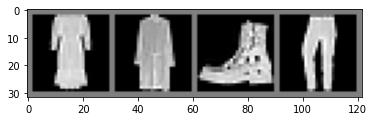

Dress  Coat Ankle Boot Trouser


In [3]:
def imshow(img):
    img = img / 2 + 0.5 # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()
print("Our image batch shape is", images.size())
imshow(torchvision.utils.make_grid(images))

print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

# Import the Stanford Sentiment Treebank

In [4]:
!curl -fsS https://nlp.stanford.edu/sentiment/trainDevTestTrees_PTB.zip -o /tmp/trainDevTestTrees_PTB.zip
!unzip -q -o -d ./data /tmp/trainDevTestTrees_PTB.zip
!rm -f /tmp/trainDevTestTrees_PTB.zip

In [5]:
def loadsst(path):
    xs = []
    ys = []
    file1 = open(path, 'r')
    Lines = file1.readlines()
    for line in Lines:
        soup = line.split()
        ys.append(int(soup[0].lstrip('(')))
        tokens = []
        for chunk in soup[2:]:
            if not chunk.endswith(")"):
                continue
            tokens.append(chunk.rstrip(')'))
        xs.append(tokens)
    return xs, ys

ssttrainxs, ssttrainys = loadsst("./data/trees/train.txt")
sstvalidxs, sstvalidys = loadsst("./data/trees/dev.txt")
ssttestxs, ssttestys = loadsst("./data/trees/test.txt") 

# Import the Google News Dataset

This is 1.5GB - execute with caution (results are cached, don't worry)

In [6]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

embedding = lambda word: torch.from_numpy(wv.get_vector(word) / np.linalg.norm(wv.get_vector(word)))
distance = lambda word1, word2: wv.distance(word1, word2)

In [7]:
print(distance("dog", "cat"))
print(distance("cat", "dog"))
print(distance("cat", "human"))
print(distance("dog", "human"))
print(distance("ape", "human"))

0.23905426263809204
0.23905426263809204
0.7556332349777222
0.8109204322099686
0.6500701606273651


We can also verify that the embedding() works as in the Julia noteboook 10.01 - The results should begin with `0.0172, -0.0075, -0.0580`

In [8]:
dog_embeddings = embedding("dog")
print(dog_embeddings.size())
dog_embeddings[:10]

torch.Size([300])


tensor([ 0.0172, -0.0075, -0.0580,  0.0541, -0.0283,  0.0192,  0.0197, -0.0277,
        -0.0052, -0.0213])